In [1]:
import pickle
from scipy import stats
import os
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def get_rejections_and_avgswaps_for_plots(graphspace):
    print(graphspace)
    rejections_list = []
    avg_swaps_list = []

    for diagnostic_name in ["Geweke/", "GelmanRubin/" ,"RafteryLewis/"]:
        num_rejections = 0
        num_count = 0
        avg_swaps = []
        Allfiles = os.listdir("../../Output/OtherDiagnosticTests/" + diagnostic_name + graphspace + "/")
        for f in Allfiles:
            if f == ".ipynb_checkpoints":
                pass
            else:
                pickleFile = "../../Output/OtherDiagnosticTests/" + diagnostic_name" + graphspace + "/" + f
                pickle_in = open(pickleFile,"rb")
                savedList = pickle.load(pickle_in)
                num_count += 1
                pval = savedList[2][2]
                avg_swaps.append((savedList[2][5])/savedList[1])
                if pval < 0.05: # Indication of early convergence
                    num_rejections += 1
                    
        rejections_list.append(num_rejections/num_count*100)
        avg_swaps_list.append(np.mean(avg_swaps))
                
    return rejections_list, avg_swaps_list

In [3]:
spaces = ["SimpleStub/", "SimpleVertex/", "LoopyOnlyStub/", "LoopyOnlyVertex/", "MultiLoopyStub/",
          "MultiLoopyVertex/", "MultiOnlyStub/", "MultiOnlyVertex/"]

Geweke_meanswaps = []
Gelman_meanswaps = []
Raftery_meanswaps = []

Geweke_rejection = []
Raftery_rejection = []
Gelman_rejection = []

for space in spaces:
    rejections_list, avg_swaps_list = get_rejections_and_avgswaps_for_plots(space)
    Geweke_meanswaps.append(avg_swaps_list[0])
    Gelman_meanswaps.append(avg_swaps_list[1])
    Raftery_meanswaps.append(avg_swaps_list[2])
    
    Geweke_rejection.append(rejections_list[0])
    Gelman_rejection.append(rejections_list[1])
    Raftery_rejection.append(rejections_list[2])
    
DFGLS_meanswaps = []
DFGLS_rejection = []

for space in spaces:
    path = "../../Output/NetworksDetectedAtConvergence/" + space
    files = os.listdir(path)
    thisSpace_meanswaps = []
    for f in files:
        if f != ".ipynb_checkpoints":
            pickleFile = path + "/" +f
            pickle_in = open(pickleFile,"rb")
            savedList = pickle.load(pickle_in)
            
            allswaps = savedList[3] # An array of 200 elements. 
            meanswaps = np.mean(allswaps)
            edgecount = savedList[1]
            thisSpace_meanswaps.append(meanswaps/edgecount)
    DFGLS_meanswaps.append(np.mean(thisSpace_meanswaps))
    
    num_rejections = 0
    num_count = 0
    path = "../../Output/All8NetworkStatisticsAtConvergence/" + space
    files = os.listdir(path)
    
    for f in files:
        if f != ".ipynb_checkpoints":
            pickleFile = path + f
            pickle_in = open(pickleFile,"rb")
            savedList = pickle.load(pickle_in)
            pval = savedList[2][4]
            num_count += 1
            if pval < 0.05: # Indication of early convergence
                num_rejections += 1
            
    DFGLS_rejection.append(num_rejections/num_count*100)

SimpleStub/
SimpleVertex/
LoopyOnlyStub/
LoopyOnlyVertex/
MultiLoopyStub/
MultiLoopyVertex/
MultiOnlyStub/
MultiOnlyVertex/


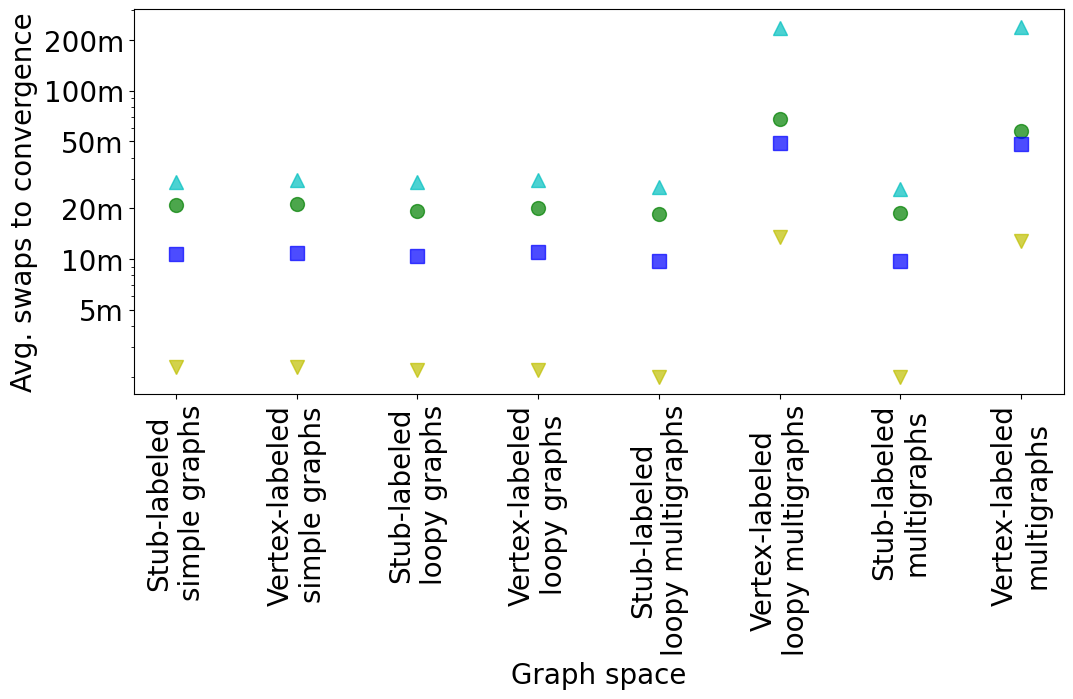

In [4]:
plt.figure(figsize=(12, 5))

spaces = ["Stub-labeled\nsimple graphs", "Vertex-labeled\nsimple graphs", "Stub-labeled\nloopy graphs", 
          "Vertex-labeled\nloopy graphs", "Stub-labeled\nloopy multigraphs", "Vertex-labeled\nloopy multigraphs",
         "Stub-labeled\nmultigraphs", "Vertex-labeled\nmultigraphs"]

plt.errorbar(spaces, Geweke_meanswaps, linestyle='None', marker='^', markersize = 10, capsize = 5, label = "Geweke", c = 'c', alpha = 0.7)
plt.errorbar(spaces, DFGLS_meanswaps, linestyle='None', marker='o', markersize = 10, capsize = 5, label = "DFGLS", c = 'g', alpha = 0.7)
plt.errorbar(spaces, Gelman_meanswaps, linestyle='None', marker='s', markersize = 10, capsize = 5, label = "Gelman-Rubin", c = 'b', alpha = 0.7)
plt.errorbar(spaces, Raftery_meanswaps, linestyle='None', marker='v', markersize = 10, capsize = 5, label = "Raftery-Lewis", c = 'y', alpha = 0.7)
plt.xticks(rotation="vertical", fontsize = 20)

plt.xlabel("Graph space", fontsize = 20, color = "black")
plt.ylabel("Avg. swaps to convergence", fontsize = 20, color = "black")
plt.yscale('log')
real_ticks = [5, 10, 20, 50, 100, 200]
tick_names = ["5m","10m","20m", "50m","100m", "200m"]
plt.yticks(real_ticks, tick_names)
plt.yticks(fontsize = 20)

plt.show()

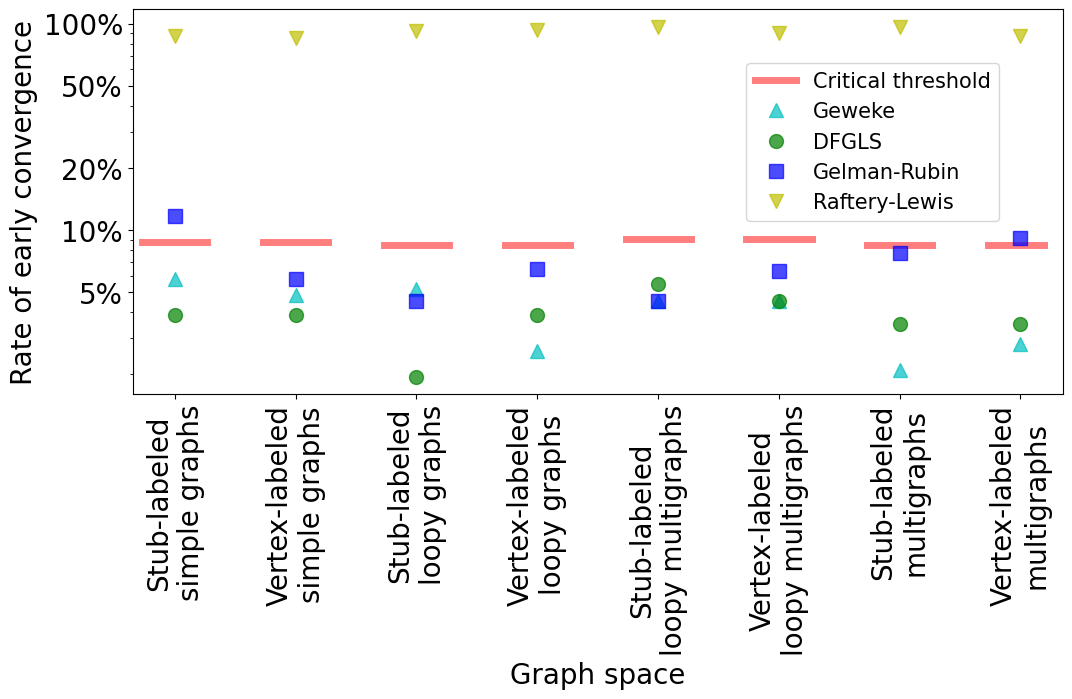

In [5]:
plt.figure(figsize=(12, 5))

spaces = [i for i in range(0, 16, 2)]

plt.axhline(8.73, xmin = 0.01, xmax = 0.08, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.73, xmin = 0.14, xmax = 0.21, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.44, xmin = 0.27, xmax = 0.34, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.44, xmin = 0.40, xmax = 0.47, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(9.09, xmin = 0.53, xmax = 0.60, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(9.09, xmin = 0.66, xmax = 0.73, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.45, xmin = 0.79, xmax = 0.86, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(8.45, xmin = 0.92, xmax = 0.98, color='r', lw = 5, ls = "-", alpha = 0.5, label = "Critical threshold")

plt.errorbar(spaces, Geweke_rejection, linestyle='None', marker='^', markersize = 10, capsize = 5, label = "Geweke", c = 'c', alpha = 0.7)
plt.errorbar(spaces, DFGLS_rejection, linestyle='None', marker='o', markersize = 10, capsize = 5, label = "DFGLS", c = 'g', alpha = 0.7)
plt.errorbar(spaces, Gelman_rejection, linestyle='None', marker='s', markersize = 10, capsize = 5, label = "Gelman-Rubin", c = 'b', alpha = 0.7)
plt.errorbar(spaces, Raftery_rejection, linestyle='None', marker='v', markersize = 10, capsize = 5, label = "Raftery-Lewis", c = 'y', alpha = 0.7)
plt.xticks(rotation="vertical", fontsize = 20)

plt.xlabel("Graph space", fontsize = 20, color = "black")
plt.ylabel("Rate of early convergence", fontsize = 20, color = "black")
plt.yscale('log')
real_ticks = [5, 10, 20, 50, 100]
tick_names = ["5%", "10%", "20%", "50%", "100%"]
plt.yticks(real_ticks, tick_names)
plt.yticks(fontsize = 20)

spaces_text = ["Stub-labeled\nsimple graphs", "Vertex-labeled\nsimple graphs", "Stub-labeled\nloopy graphs", 
          "Vertex-labeled\nloopy graphs", "Stub-labeled\nloopy multigraphs", "Vertex-labeled\nloopy multigraphs",
         "Stub-labeled\nmultigraphs", "Vertex-labeled\nmultigraphs"]

plt.xticks(spaces, spaces_text)
plt.legend(fontsize = 15, loc = (0.66, 0.45))
plt.show()